In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path

In [2]:
# Hier euren Pfad zur CSV einfügen
path = "C:/Users/lorga/Desktop/Parlament/data/output.csv"
meps_df = pd.read_csv(path, sep = ";")

In [9]:
meps_df.head()

,identifier,name,familyName,givenName,country,group,gender,citizenship,memberships,born_place,born_day,born_month,born_year,disability,relatives,degrees,educated_at,occupation,born_region
0,28372,ryszard czarnecki,Czarnecki,Ryszard,PL,ECR,MALE,POL,"D-RU,PETI,DEVE,CONT,DROI,DARP,DCAS",Londyn (GB),25,1,1963,NaN,NaN,NaN,University of Wrocław,politician,other
1,124852,sergei stanishev,Stanishev,Sergei,BG,S&D,MALE,BGR,"AFET,D-MK,ECON,D-AL",Kherson,5,5,1966,NaN,Dimitar Stanishev,NaN,"Goodenough College,MSU Faculty of History",politician,other
2,96833,jens geier,Geier,Jens,DE,S&D,MALE,DEU,"ITRE,D-JP,BUDG,D-US",Frankfurt,22,6,1961,NaN,NaN,Magister Artium,"Ruhr University Bochum,Helmholtz-Gymnasium (Es...","consultant,historian,politician",native
3,99945,lena düpont,Düpont,Lena,DE,PPE,FEMALE,DEU,"LIBE,D-ME,AGRI,FEMM,D-JP",Dortmund,30,4,1986,NaN,NaN,NaN,NaN,politician,native
4,204333,salvatore de meo,De Meo,Salvatore,IT,PPE,MALE,ITA,"AFCO,AGRI,D-RS,D-IN,ITRE,IMCO,D-RU",Fondi,27,10,1971,NaN,NaN,NaN,Sapienza University of Rome,"businessperson,politician",native


In [3]:
gender_percentages_df = pd.DataFrame(meps_df.value_counts("gender"))
gender_percentages_df = gender_percentages_df.reset_index().rename(columns = {0: "count"})
gender_percentages_df["percentage"] = gender_percentages_df["count"] / gender_percentages_df["count"].sum()
gender_percentages_df

,gender,count,percentage
0,MALE,427,0.601408
1,FEMALE,283,0.398592


In [8]:
gender_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    female_count = len(group_df.loc[group_df["gender"] == "FEMALE"].index)
    if len(group_df.index > 0):
        female_percentage = female_count / len(group_df.index) * 100
        gender_dict[group] = female_percentage
group_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
group_percentage_df = group_percentage_df.rename(columns = {0: "Percentage of women"})
group_percentage_df.sort_values("Percentage of women")

,Percentage of women
ECR,27.941176
NI,31.372549
PPE,37.777778
ID,37.931034
S&D,42.253521
Renew,42.574257
Verts/ALE,49.295775
The Left,51.282051


In [18]:
gender_dict = {}
for country in set(meps_df["country"].tolist()):
    country_df = meps_df.loc[meps_df["country"] == country]
    female_count = len(country_df.loc[country_df["gender"] == "FEMALE"].index)
    if len(country_df.index > 0):
        female_percentage = female_count / len(country_df.index) * 100
        gender_dict[country] = female_percentage
country_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
country_percentage_df = country_percentage_df.rename(columns = {0: "Percentage of women"})
country_percentage_df.sort_values("Percentage of women")
country_percentage_df = country_percentage_df.reset_index().rename(columns = {"index": "country"})
country_percentage_df.to_csv("gender_country.csv", index = False)

In [4]:
org_list = []
for list_entry in meps_df["memberships"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            org_list.append(entry)
list(set(org_list))
org_list.remove("nan")
org_list

['D-RU',
 'PETI',
 'DEVE',
 'CONT',
 'DROI',
 'DARP',
 'DCAS',
 'AFET',
 'D-MK',
 'ECON',
 'D-AL',
 'ITRE',
 'D-JP',
 'BUDG',
 'D-US',
 'LIBE',
 'D-ME',
 'AGRI',
 'FEMM',
 'D-JP',
 'AFCO',
 'AGRI',
 'D-RS',
 'D-IN',
 'ITRE',
 'IMCO',
 'D-RU',
 'ITRE',
 'DACP',
 'DAFR',
 'DEVE',
 'DMAS',
 'ITRE',
 'JURI',
 'D-US',
 'DLAT',
 'ENVI',
 'DEVE',
 'DMAS',
 'LIBE',
 'D-AF',
 'AFET',
 'DMED',
 'EMPL',
 'TRAN',
 'DMAS',
 'DACP',
 'ITRE',
 'D-IR',
 'DLAT',
 'TRAN',
 'D-CA',
 'DCAM',
 'DASE',
 'TRAN',
 'D-CN',
 'ECON',
 'EMPL',
 'FEMM',
 'DACP',
 'DCAB',
 'DEVE',
 'PETI',
 'D-MX',
 'D-CA',
 'DLAT',
 'REGI',
 'D-MD',
 'PETI',
 'D-UA',
 'ECON',
 'DMER',
 'DASE',
 'IMCO',
 'AGRI',
 'FISC',
 'DEEA',
 'ECON',
 'FISC',
 'D-US',
 'EMPL',
 'BUDG',
 'LIBE',
 'D-CN',
 'D-AL',
 'ENVI',
 'DCAS',
 'ITRE',
 'SANT',
 'D-RU',
 'DMED',
 'ENVI',
 'ECON',
 'FISC',
 'DARP',
 'DSAS',
 'DMED',
 'LIBE',
 'DMAG',
 'DMED',
 'AFET',
 'AFET',
 'EMPL',
 'D-BY',
 'DEPA',
 'SEDE',
 'FEMM',
 'D-US',
 'CULT',
 'DANZ',
 'AFCO',
 

In [7]:
def filter_percentage_df(column, filter_list, meps_df):
    gender_dict = {}
    non_na_df = meps_df.loc[meps_df[column].notna()]
    for filter_entry in filter_list:
        filter_df = non_na_df.loc[non_na_df[column].str.contains(filter_entry)]
        female_count = len(filter_df.loc[filter_df["gender"] == "FEMALE"].index)
        if len(filter_df.index > 0):
            female_percentage = female_count / len(filter_df.index) * 100
            gender_dict[filter_entry] = female_percentage
    filter_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
    filter_percentage_df = filter_percentage_df.rename(columns = {0: "Percentage of women"})
    return filter_percentage_df.sort_values("Percentage of women")
committee_list = [org for org in org_list if not "D-" in org]
committee_percentage_df = filter_percentage_df("memberships", committee_list, meps_df)
committee_percentage_df

,Percentage of women
AFCO,19.642857
DARP,20.000000
DPAC,25.000000
DSEE,25.000000
BUDG,26.923077
SEDE,27.586207
AFET,28.571429
DCAS,29.411765
FISC,30.769231
ECON,31.304348


Where were MEPs born?

In [9]:
mep_origin_dict = {}
for country in set(meps_df["country"].tolist()):
    mep_origin_dict[country] = []
    country_meps_df = meps_df.loc[meps_df["country"] == country]
    birthplaces = country_meps_df["born_place"].tolist()
    success, native_born, eu_born, counter, non_native_birthplaces = native_born_counter(birthplaces, country)
    mep_origin_dict[country] = [country, 
                             round((success / counter * 100), 2), 
                             round((native_born / success * 100), 2), 
                             round((eu_born / success * 100), 2), 
                             round(((success - native_born - eu_born) / success * 100), 2)]
mep_origin_df = pd.DataFrame.from_dict(mep_origin_dict)
mep_origin_df = mep_origin_df.transpose()
mep_origin_df = mep_origin_df.drop(columns = [0])
mep_origin_df = mep_origin_df.rename(columns = {1: "Identified", 2: "Native-born", 3: "EU-born", 4: "Foreign-born"})
mep_origin_df.head()

,Identified,Native-born,EU-born,Foreign-born
IT,97.37,90.54,9.46,0.0
CZ,100.0,100.0,0.0,0.0
MT,83.33,100.0,0.0,0.0
ES,96.61,92.98,1.75,5.26
EE,100.0,100.0,0.0,0.0


In [22]:
meps_df["born_region"].value_counts()

native            596
other              51
not recognised     40
eu                 15
Name: born_region, dtype: int64

When were MEPs born?

In [41]:
meps_birthyear_df = pd.DataFrame(meps_df["born_year"].value_counts())
meps_birthyear_df = meps_birthyear_df.reset_index().rename(columns = {"index": "year", "born_year": "count"})
meps_birthyear_df = meps_birthyear_df.sort_values(by = "year")
meps_birthyear_df = meps_birthyear_df.loc[meps_birthyear_df["year"] > 1900]
meps_birthyear_df.head()

,year,count
51,1940,1
45,1944,3
50,1945,2
48,1946,2
44,1947,3


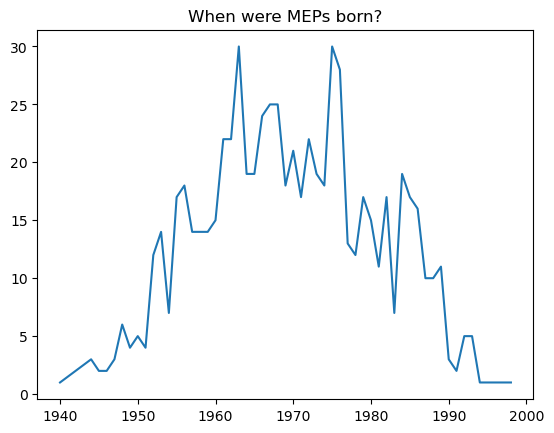

In [42]:
plt.plot(meps_birthyear_df["year"], meps_birthyear_df['count'])
plt.title("When were MEPs born?")
plt.show()

How do committees vary in median age?

In [36]:
def get_median_age(column, filter_list, meps_df):
    df = meps_df.loc[meps_df[column].notna()]
    df = df.loc[meps_df["born_year"] != 0]
    median_age_dict = {}
    for filter_entry in filter_list:
        filter_df = df.loc[df[column].str.contains(filter_entry)]
        birth_dates = filter_df["born_year"].tolist()
        ages = [(2023 - birth_date) for birth_date in birth_dates]
        median_age = sum(ages) / len(ages)
        median_age_dict[filter_entry] = median_age
    median_age_df = pd.DataFrame.from_dict(median_age_dict, orient = "index")
    median_age_df = median_age_df.reset_index().rename(columns = {"index": "org", 0: "median_age"})
    return median_age_df

In [39]:
committee_list = [org for org in org_list if not "D-" in org]
committee_list = [committee for committee in committee_list if committee != "nan"]
committee_median_age_df = get_median_age("memberships", committee_list, meps_df)
committee_median_age_df = committee_median_age_df.rename(columns = {"org": "committee"})
committee_median_age_df.head()

,committee,median_age
0,PETI,51.523077
1,DEVE,57.632653
2,CONT,53.944444
3,DROI,54.245614
4,DARP,53.033333


In [40]:
committee_median_age_df.sort_values("median_age").head()

,committee,median_age
31,SANT,50.285714
22,EMPL,51.009615
10,LIBE,51.410448
0,PETI,51.523077
14,IMCO,51.880952


In [41]:
committee_median_age_df.sort_values("median_age", ascending = False).head()

,committee,median_age
47,DNAT,57.947368
1,DEVE,57.632653
46,DPAC,57.437500
34,DEPA,55.911111
16,DAFR,55.632653


In [46]:
faction_list = set(meps_df["group"].tolist())
faction_median_age_df = get_median_age("group", faction_list, meps_df)
faction_median_age_df = faction_median_age_df.rename(columns = {"org": "faction"})
faction_median_age_df.sort_values("median_age")

,faction,median_age
7,Verts/ALE,48.816901
4,Renew,51.250000
3,The Left,51.333333
2,NI,52.686275
5,ID,53.775862
0,S&D,54.260563
1,PPE,54.977654
6,ECR,56.686567
